In [ ]:
# Este ejemplo se corre con las siguientes versiones
# pd.__version__
# 1.0.2
# sklearn.__version__
# 0.22.1
# matplotlib.__version__
# 3.1.3
# np.__version__
# 1.18.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
mean1 = (4, 15)
cov1 = [[2, 0], [0, 2]]
x1 = np.random.multivariate_normal(mean1, cov1, 100)

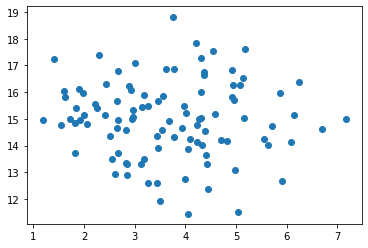

In [3]:
plt.scatter(x1[:,0],x1[:,1])
plt.show()

In [4]:
mean2 = (10, 4)
cov2 = [[10, -3], [-3, 1]]
x2 = np.random.multivariate_normal(mean2, cov2, 100)

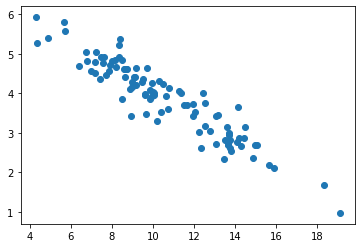

In [5]:
plt.scatter(x2[:,0],x2[:,1])
plt.show()

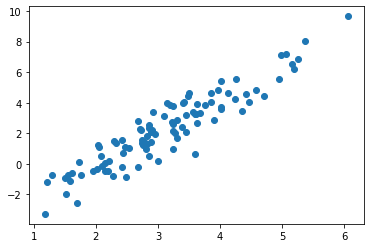

In [7]:
mean3 = (3, 2)
cov3 = [[1, 2], [2, 5]]
x3 = np.random.multivariate_normal(mean3, cov3, 100)
plt.scatter(x3[:,0],x3[:,1])
plt.show()

In [8]:
X = np.concatenate((x1,x2,x3),axis=0)
X = pd.DataFrame(X,columns=['A', 'B'])
X=((X-X.min())/(X.max()-X.min()))

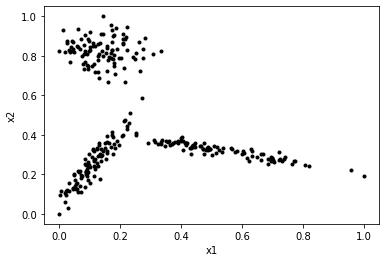

In [9]:
plt.plot(X['A'],X['B'],'k.')
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()

In [10]:
k_means = KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

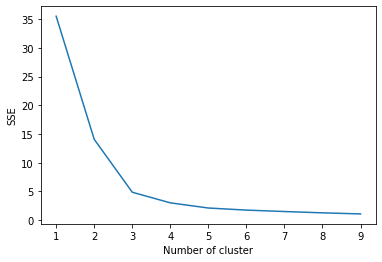

In [11]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [18]:
k_means = KMeans(n_clusters=4)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
k_means.cluster_centers_

array([[7.02389984e-01, 2.79505451e-01, 1.00000000e+00],
       [1.40246938e-01, 8.23824610e-01, 6.66133815e-16],
       [1.17112948e-01, 2.58399472e-01, 2.00000000e+00],
       [4.37754064e-01, 3.44271564e-01, 1.00000000e+00]])

In [20]:
k_means.inertia_

3.230149594643119

In [21]:
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 3, 3, 3, 3, 0, 0, 0, 3,
       3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 2, 3,
       3, 3, 0, 3, 0, 2, 0, 3, 0, 0, 2, 3, 3, 3, 2, 3, 0, 3, 3, 3, 0, 3,
       3, 2, 0, 3, 3, 3, 0, 0, 2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [22]:
X['clase'] = k_means.labels_

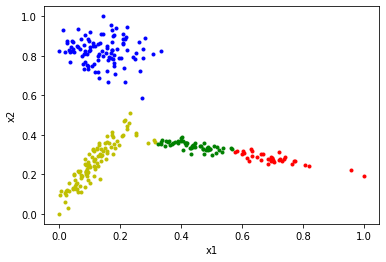

In [23]:
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(X['A'][X['clase']==i],X['B'][X['clase']==i],colores[i])
plt.ylabel('x2')
plt.xlabel('x1')
plt.show()